## Business Understanding

Time deposits are one of the savings products provided by banks to their customers besides regular savings. Deposits are banking products where customers deposit a certain amount of money to be stored in the bank for a long period of time. This money cannot be withdrawn before a specified period of time, for example 1 year, 5 years or 10 years. The advantage of deposits obtained by customers is that the bank's interest rate offered is higher than other banking products.

One of the most effective ways to reach out customers is by Telephonic Marketing Campaign. However, the cost of running this campaign is quite expensive. The bank needs to invest in supporting properties and hire a lot of call centers to execute this campaign.

Hence, it is important to identify the customers most likely to subscribe the campaign. By creating a model to helps the marketing team work in effective and efficient way, the bank could lead to significant cost reduction. 



## Problem Statements dan Goals

Goal : Marketing Campaign Prediction

Problem Statements : 

(a)	Which features contributes high subscription rates?

(b)	Which analytics model has the highest score prediction?

(c)	What strategy the marketing team could use to succeed in their campaign?


## Methodology

Subscribed prediction is a goal to be achieved. As we know, subscribed is a Binary Classification. In classification analytics the problem will be solved using a Classification model. Therefore, the methodology in this project is build a Binary Classification model with Subscribed as the target

Data : Marketing Target Analysis dataset was obtained from kaggle.com

Data Assumption  : test.csv is not avalaible due to the missing of y_test values. In this project we are going to use only train.csv.




## Data Dictionary

1 - ID : ID of client

2 - age (numeric)

3 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

4 - marital : marital status (categorical: "divorced","married","single"; note: "divorced" means divorced or widowed)

5 - education (categorical: "primary","secondary","tertiary,"unknown")

6 - default: has credit in default? (categorical: "no","yes")

7 - balance : has money in account? (numeric)

8 - housing: has housing loan? (categorical: "no","yes")

9 - loan: has personal loan? (categorical: "no","yes")

10 - contact: contact communication type (categorical: "cellular","telephone")

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - day: last contact day of the week

13 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

14 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

15 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

16 - previous: number of contacts performed before this campaign and for this client (numeric)

17 - poutcome: outcome of the previous marketing campaign (categorical: "failure","unknown","other","success")

Output variable (desired target):

18 - subscribed - has the client subscribed a term deposit? (binary: "yes","no")

We can't use test.csv because of we don't have y_test values.In this notebook I'am going to use only train.csv.

## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# load dataset
train = pd.read_csv('/content/drive/MyDrive/Bootcamp Datasciences/Kelas/Final Project/Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Bootcamp Datasciences/Kelas/Final Project/Dataset/test.csv')
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [ ]:
train = train.drop('ID',axis = 1)

In [ ]:
train.shape , test.shape

((31647, 17), (13564, 17))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


## Data Cleaning

In [ ]:
train.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [ ]:
train.duplicated().sum()

0

## Exploratory Data Analysis

In [ ]:
# Merubah nilai target dari kategorik (yes,no) menjadi numerik (0,1) agar mempermudah proses EDA
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(train['subscribed'])
train['subscribed'] = le.transform(train['subscribed']) 

In [ ]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [ ]:
numerik = ['age','balance','day','duration','campaign','pdays','previous','subscribed']
train_numerik = train[numerik]
train_numerik.head()
# Dataset ini akan kita gunakan sebagai baseline model

,age,balance,day,duration,campaign,pdays,previous,subscribed
0,56,1933,19,44,2,-1,0,0
1,31,3,20,91,2,-1,0,0
2,27,891,18,240,1,-1,0,0
3,57,3287,22,867,1,84,3,1
4,31,119,4,380,1,-1,0,0


In [ ]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272,0.117389
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529,0.321888
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


Text(0.5, 0, 'Customer Age')

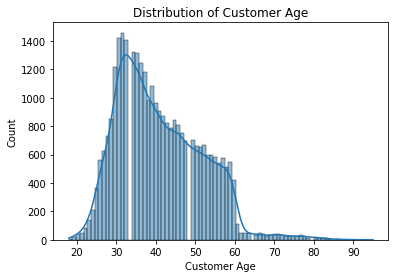

In [ ]:
# fitur age
import seaborn as sns
sns.histplot(train['age'],kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')

In [ ]:
# umur 60 tahun keatas terindikasi outliers, maka perlu di cek value dari umur > 60

bool_filter = (train['job'] == 'retired') & (train['age'] > 60)
train[bool_filter].sort_values('age',ascending = False).head(10)

# ternyata di isi oleh para pensiunan dengan umur maximum adalah 95 tahun, value masih masuk akal dan dapat digunakan.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
12870,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,1
19775,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,0
14140,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13,9,success,1
11394,92,retired,married,unknown,no,775,no,no,cellular,22,oct,313,3,-1,0,unknown,1
30257,90,retired,divorced,primary,no,712,no,no,telephone,3,mar,557,1,-1,0,unknown,1
25960,89,retired,divorced,primary,no,1323,no,no,telephone,29,dec,207,4,189,1,other,0
15419,89,retired,married,primary,no,0,no,no,telephone,27,sep,157,5,-1,0,unknown,0
6390,88,retired,married,primary,no,648,no,no,telephone,3,sep,318,1,-1,0,unknown,0
14290,88,retired,married,secondary,no,433,no,no,telephone,15,sep,161,1,274,1,failure,0
920,87,retired,married,primary,no,230,no,no,cellular,30,oct,144,1,-1,0,unknown,1


In [ ]:
# fitur job
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [ ]:
# membuat dataframe Eduratio, sebagai acuan untuk memodifikasi value unknown di kolom job dan education
eduRatio = pd.DataFrame({'Job' : []})
for i in train["job"].unique():
    eduRatio = eduRatio.append(train[(train["job"] == i)]["education"].value_counts().to_frame().iloc[0] * 100 / train[(train["job"] == i)]["education"].value_counts().sum())
eduRatio["Job"] = train["job"].unique()
eduRatio

,Job,education
secondary,admin.,82.153677
unknown,unknown,47.087379
secondary,services,83.396486
tertiary,management,82.301551
secondary,technician,68.890145
secondary,retired,43.392630
secondary,blue-collar,54.808536
primary,housemaid,49.771167
tertiary,self-employed,52.894034
secondary,student,54.488189


In [ ]:
# mehandle value unknown pada kolom job
train.loc[(train.job == "unknown") & (train.education == "secondary"),"job"] = "services"
train.loc[(train.job == "unknown") & (train.education == "primary"),"job"] = "housemaid"
train.loc[(train.job == "unknown") & (train.education == "tertiary"),"job"] = "management"
train.loc[(train.job == "unknown"),"job"] = "blue-collar"

In [ ]:
train["job"].value_counts()

blue-collar      6939
management       6662
technician       5307
admin.           3631
services         2952
retired          1574
self-employed    1123
entrepreneur     1008
housemaid         911
unemployed        905
student           635
Name: job, dtype: int64

In [ ]:
train.groupby('job').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,job,subscribed
8,student,0.286614
5,retired,0.229987
10,unemployed,0.142541
4,management,0.138997
6,self-employed,0.124666
0,admin.,0.124484
9,technician,0.111928
3,housemaid,0.088913
7,services,0.088415
2,entrepreneur,0.084325


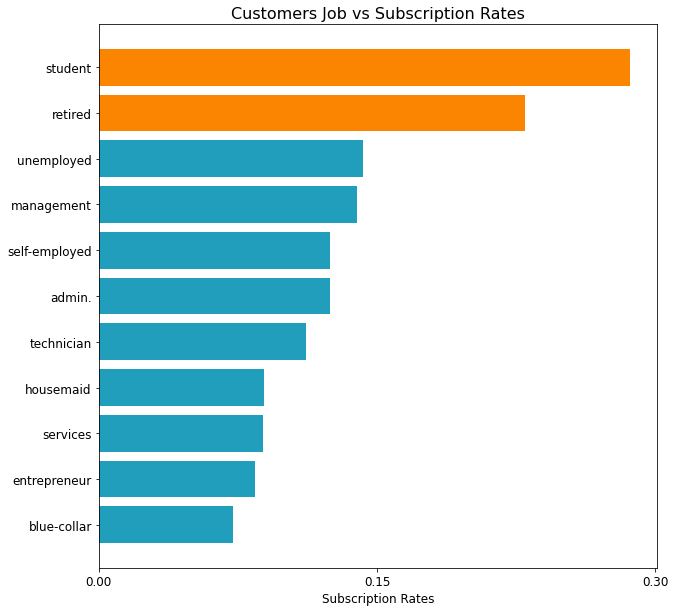

In [ ]:
y = train.groupby('job').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=True)['subscribed']
x = train.groupby('job').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=True)['job']

plt.figure(figsize=(10,10))
plt.title('Customers Job vs Subscription Rates',size=16)
plt.barh(x,y,color=['#219ebc','#219ebc','#219ebc','#219ebc','#219ebc','#219ebc','#219ebc','#219ebc','#219ebc','#fb8500','#fb8500'])
plt.xticks([0,0.15,0.30],size=12)
plt.yticks(size=12)
plt.xlabel('Subscription Rates',size=12)
plt.show()

In [ ]:
# fitur marital
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [ ]:
train.groupby('marital').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,marital,subscribed
2,single,0.151423
0,divorced,0.122590
1,married,0.100498


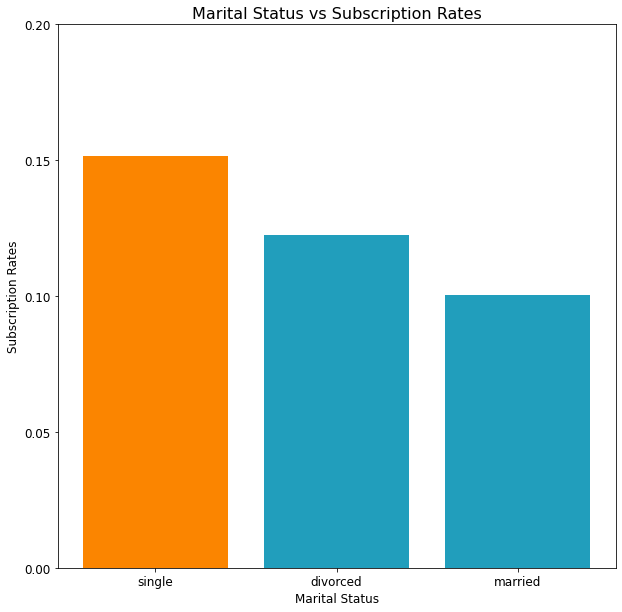

In [ ]:
x = train.groupby('marital').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['marital']
y = train.groupby('marital').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['subscribed']

plt.figure(figsize=(10,10))
plt.title('Marital Status vs Subscription Rates',size=16)
plt.bar(x,y,color=['#fb8500','#219ebc','#219ebc'])
plt.xticks(size=12)
plt.yticks([0,0.05,0.10,0.15,0.2],size=12)
plt.xlabel('Marital Status',size=12)
plt.ylabel('Subscription Rates',size=12)
plt.show()

In [ ]:
# menggali insight dari fitur education
train['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [ ]:
# mehandle value unknown pada kolom education
train.loc[(train.education == "unknown") & (train.job == "admin."),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "management"),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "services"),"education"] = "tertiary"
train.loc[(train.education == "unknown") & (train.job == "technician."),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "retired"),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "blue-collar"),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "housemaid."),"education"] = "primary"
train.loc[(train.education == "unknown") & (train.job == "self-employed"),"education"] = "tertiary"
train.loc[(train.education == "unknown") & (train.job == "student"),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "entrepreneur"),"education"] = "tertiary"
train.loc[(train.education == "unknown") & (train.job == "unemployed"),"education"] = "secondary"

train.loc[(train.education == "unknown"),"education"] = "secondary"

In [ ]:
train["education"].value_counts()

secondary    17350
tertiary      9489
primary       4808
Name: education, dtype: int64

In [ ]:
train.groupby('education').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,education,subscribed
2,tertiary,0.151017
1,secondary,0.106916
0,primary,0.088810


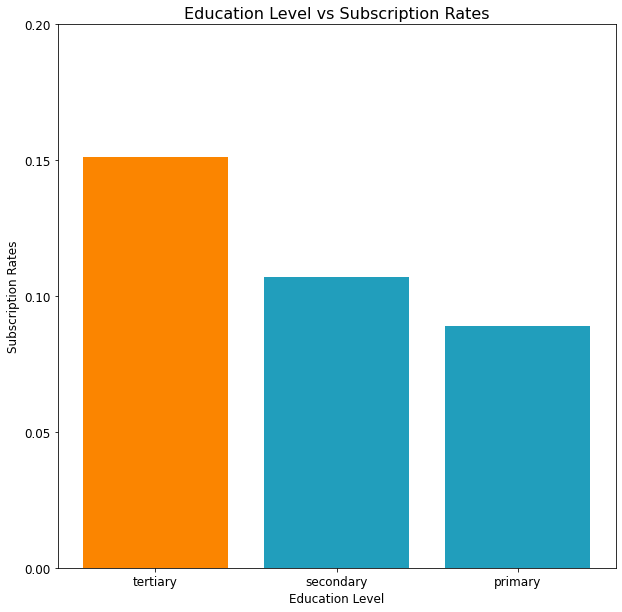

In [ ]:
x = train.groupby('education').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['education']
y = train.groupby('education').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['subscribed']

plt.figure(figsize=(10,10))
plt.title('Education Level vs Subscription Rates',size=16)
plt.bar(x,y,color=['#fb8500','#219ebc','#219ebc'])
plt.xticks(size=12)
plt.yticks([0,0.05,0.10,0.15,0.2],size=12)
plt.xlabel('Education Level',size=12)
plt.ylabel('Subscription Rates',size=12)
plt.show()

In [ ]:
# menggali insight dari fitur default
train['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

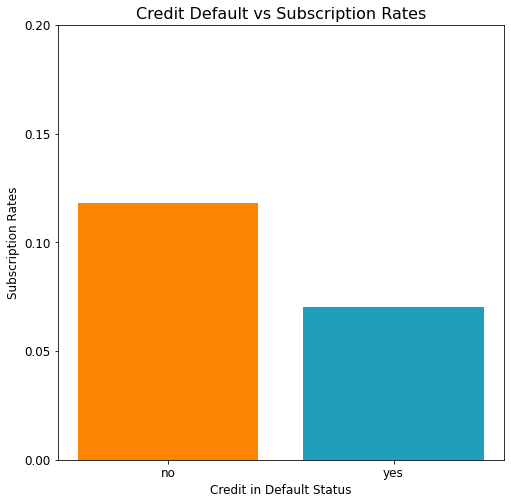

In [ ]:
x = train.groupby('default').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['default']
y = train.groupby('default').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['subscribed']

plt.figure(figsize=(8,8))
plt.title('Credit Default vs Subscription Rates',size=16)
plt.bar(x,y,color=['#fb8500','#219ebc'])
plt.xticks(size=12)
plt.yticks([0,0.05,0.10,0.15,0.2],size=12)
plt.xlabel('Credit in Default Status',size=12)
plt.ylabel('Subscription Rates',size=12)
plt.show()

In [ ]:
# menggali insight dari fitur housing
train['housing'].value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

In [ ]:
train.groupby('housing').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,housing,subscribed
0,no,0.168172
1,yes,0.076774


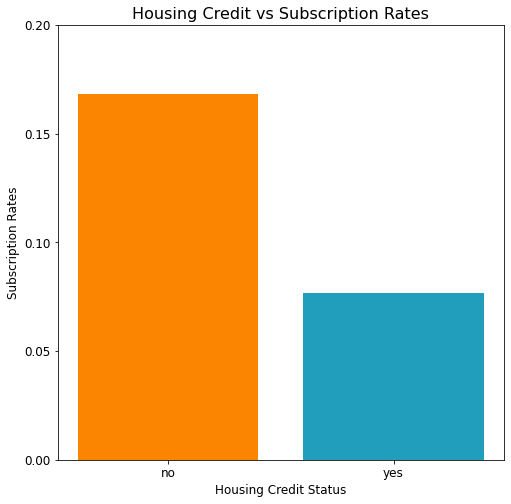

In [ ]:
x = train.groupby('housing').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['housing']
y = train.groupby('housing').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['subscribed']

plt.figure(figsize=(8,8))
plt.title('Housing Credit vs Subscription Rates',size=16)
plt.bar(x,y,color=['#fb8500','#219ebc'])
plt.xticks(size=12)
plt.yticks([0,0.05,0.10,0.15,0.2],size=12)
plt.xlabel('Housing Credit Status',size=12)
plt.ylabel('Subscription Rates',size=12)
plt.show()

In [ ]:
# menggali insight dari fitur loan
train['loan'].value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

In [ ]:
train.groupby('loan').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,loan,subscribed
0,no,0.127621
1,yes,0.064510


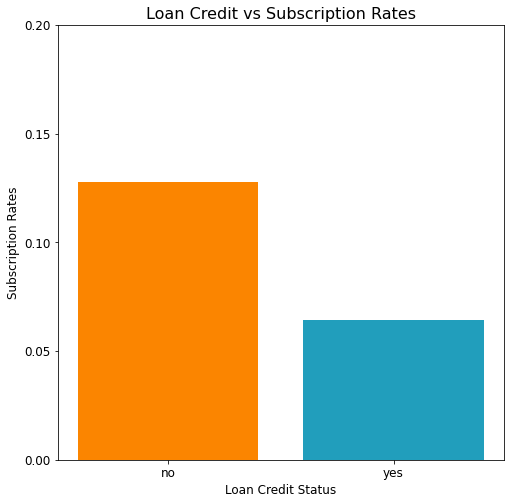

In [ ]:
x = train.groupby('loan').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['loan']
y = train.groupby('loan').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['subscribed']

plt.figure(figsize=(8,8))
plt.title('Loan Credit vs Subscription Rates',size=16)
plt.bar(x,y,color=['#fb8500','#219ebc'])
plt.xticks(size=12)
plt.yticks([0,0.05,0.10,0.15,0.2],size=12)
plt.xlabel('Loan Credit Status',size=12)
plt.ylabel('Subscription Rates',size=12)
plt.show()

In [ ]:
# menggali insight dari fitur contact
train['contact'].value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

In [ ]:
# mehandle value unknown pada kolom contact
train["contact"].replace(["unknown"],train["contact"].mode(),inplace = True)

In [ ]:
train['contact'].value_counts()

cellular     29600
telephone     2047
Name: contact, dtype: int64

In [ ]:
train.groupby('contact').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,contact,subscribed
1,telephone,0.130923
0,cellular,0.116453


In [ ]:
train['month'].value_counts().sort_values(ascending=False)

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

In [ ]:
# menggali insight dari fitur poutcome
train['poutcome'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [ ]:
# Mengecek value unknown pada poutcome, terlihat semua value 'unknown' pada poutcomes memiliki nilai pdays = -1,
filter = (train['poutcome'] == 'unknown')
train[filter].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,secondary,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,services,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
5,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,0


In [ ]:
# mencari value unknown yang tidak sama dengan 1
filter = (train['poutcome'] == 'unknown') & (train['pdays'] != -1) 
train[filter]
# terdapat 5 baris yang memiliki nilai poutcome = uknown dan pdays = -1
# karena nilai relatif sedikit, maka saya akan membiarkannya 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
12610,39,management,married,tertiary,no,184,no,no,cellular,15,oct,206,1,168,5,unknown,0
15099,61,retired,married,tertiary,no,3140,yes,yes,cellular,6,aug,975,4,98,1,unknown,1
18469,30,technician,single,secondary,no,254,yes,yes,cellular,24,jun,167,3,416,2,unknown,0
25409,26,admin.,single,secondary,no,338,no,no,cellular,29,oct,209,1,188,2,unknown,1
25640,37,management,married,secondary,no,209,no,no,cellular,14,oct,183,3,528,7,unknown,0


In [ ]:
filter = (train['poutcome'] != 'unknown') & (train['pdays'] == -1) 
train[filter].head()
# tidak ada nilai uknown pada poutcomes yang memiliki nilai pdays selain -1
# maka fitur poutcomes bisa tetap di gunakan dengan terlebih dahulu memproses nilai -1 pada pdays

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed


In [ ]:
train['poutcome'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [ ]:
train.groupby('poutcome').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,poutcome,subscribed
2,success,0.649813
1,other,0.168478
0,failure,0.128198
3,unknown,0.091519


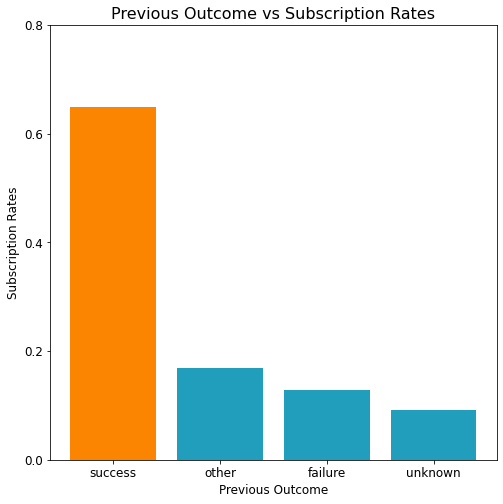

In [ ]:
x = train.groupby('poutcome').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['poutcome']
y = train.groupby('poutcome').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['subscribed']

plt.figure(figsize=(8,8))
plt.title('Previous Outcome vs Subscription Rates',size=16)
plt.bar(x,y,color=['#fb8500','#219ebc','#219ebc','#219ebc'])
plt.xticks(size=12)
plt.yticks([0,0.2,0.4,0.6,0.8],size=12)
plt.xlabel('Previous Outcome',size=12)
plt.ylabel('Subscription Rates',size=12)
plt.show()

In [ ]:
# fitur balance
train.groupby('subscribed').agg({'balance':'median'}).reset_index().sort_values('subscribed',ascending=False)

,subscribed,balance
1,1,746.0
0,0,418.0


In [ ]:
# fitur previous
train.groupby('subscribed').agg({'previous':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,subscribed,previous
1,1,1.159354
0,0,0.496456


In [ ]:
# fitur campaign
train.groupby('subscribed').agg({'campaign':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,subscribed,campaign
1,1,2.162853
0,0,2.845876


In [ ]:
# fitur pdays
train.groupby('subscribed').agg({'pdays':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,subscribed,pdays
1,1,69.066218
0,0,35.653802


In [ ]:
# fitur duration
train.groupby('subscribed').agg({'duration':'median'}).reset_index().sort_values('subscribed',ascending=False)

,subscribed,duration
1,1,423.0
0,0,164.0


In [ ]:
# menkonversi duration dari detik ke menit
durasi_telfon = []
for i in train['duration']:
  if i < 60 : 
    durasi_telfon.append(1)
  elif i < 300 :
    durasi_telfon.append(5)
  elif i < 600 :
    durasi_telfon.append(10)
  elif i < 900 :
    durasi_telfon.append(15)
  elif i < 1200 :
    durasi_telfon.append(20)
  elif i < 1500:
    durasi_telfon.append(25)
  elif i < 1800 :
    durasi_telfon.append(30)
  else :
    durasi_telfon.append(40)

In [ ]:
train_graph = train
train_graph['durasi_telfon'] = durasi_telfon

In [ ]:
# mengelompokan customer berdasarkan umur
age_category = []
for i in train['duration']:
  if i < 20 : 
    age_category.append('0-20')
  elif i < 40 :
    age_category.append('21-40')
  elif i < 60 :
    age_category.append('41-60')
  else: 
    age_category.append('> 60')

In [ ]:
train_graph['age_category'] = age_category
train_graph.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,durasi_telfon,age_category
0,56,admin.,married,secondary,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0,1,41-60
1,31,services,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0,5,> 60
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0,5,> 60
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1,15,> 60
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0,10,> 60


In [ ]:
# menggali insight durasi telfon terhadap umur, telemarketing mengabiskan 206770 menit menelepon customer dengan umur > 60
train_graph.groupby('age_category').agg({'durasi_telfon':'sum'}).reset_index().sort_values('durasi_telfon',ascending=False)

,age_category,durasi_telfon
3,> 60,206770
2,41-60,1446
1,21-40,989
0,0-20,807


In [ ]:
# Melihat potensi age category terhadap subscription rate, umur > 60 mendapat nilai tertinggi yaitu 0.13
train_graph.groupby('age_category').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,age_category,subscribed
3,> 60,0.130611
0,0-20,0.002478
1,21-40,0.002022
2,41-60,0.000692


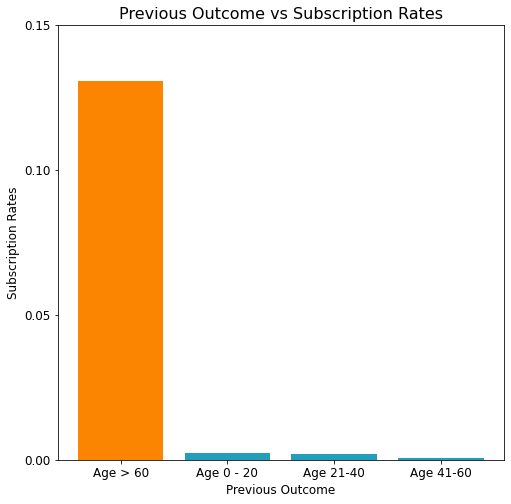

In [ ]:
x = train_graph.groupby('age_category').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['age_category']
y = train_graph.groupby('age_category').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['subscribed']

plt.figure(figsize=(8,8))
plt.title('Previous Outcome vs Subscription Rates',size=16)
plt.bar(x,y,color=['#fb8500','#219ebc','#219ebc','#219ebc'])
plt.xticks(np.arange(4),['Age > 60','Age 0 - 20', 'Age 21-40', 'Age 41-60'],size=12)
plt.yticks([0,0.05,0.1,0.15],size=12)
plt.xlabel('Previous Outcome',size=12)
plt.ylabel('Subscription Rates',size=12)
plt.show()

In [ ]:
# menghitung pengeluaran perusahaan berdasarkan durasi telfon
durasi = (train['duration'].sum())/60
print(durasi)

136141.98333333334


In [ ]:
# Menghitung subscription rates awal
train['subscribed'].value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

In [ ]:
rate = 3715/(3715+27932)
rate

0.11738869403102979

In [ ]:
# jumlah customer yang akan di telfon di awal
train.shape

(31647, 19)

In [ ]:
# fitur day dan month juga tidak perlu di gunakan karena sudah terwakilkan dengan fitu pdays
train.drop(columns = ["day","month",'age_category','durasi_telfon'],inplace = True)

In [ ]:
train['subscribed'].value_counts()
# kondisi target imbalance

0    27932
1     3715
Name: subscribed, dtype: int64

In [ ]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,secondary,no,1933,no,no,telephone,44,2,-1,0,unknown,0
1,31,services,married,secondary,no,3,no,no,cellular,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,380,1,-1,0,unknown,0


## DATA PREPROCESSING

In [ ]:
train_new = train.drop('job', axis = 1)
train_new.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed
0,56,married,secondary,no,1933,no,no,telephone,44,2,-1,0,unknown,0
1,31,married,secondary,no,3,no,no,cellular,91,2,-1,0,unknown,0
2,27,married,secondary,no,891,yes,no,cellular,240,1,-1,0,unknown,0
3,57,divorced,tertiary,no,3287,no,no,cellular,867,1,84,3,success,1
4,31,married,secondary,no,119,yes,no,cellular,380,1,-1,0,unknown,0


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(train_new['housing'])
le.fit(train_new['loan'])
le.fit(train_new['default'])

LabelEncoder()

In [ ]:
train_new['housing']= le.transform(train_new['housing'])
train_new['default']= le.transform(train_new['default']) 
train_new['loan']= le.transform(train_new['loan'])

In [ ]:
le.fit(train_new['contact'])
train_new['contact']= le.transform(train_new['contact'])

In [ ]:
train_new.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed
0,56,married,secondary,0,1933,0,0,1,44,2,-1,0,unknown,0
1,31,married,secondary,0,3,0,0,0,91,2,-1,0,unknown,0
2,27,married,secondary,0,891,1,0,0,240,1,-1,0,unknown,0
3,57,divorced,tertiary,0,3287,0,0,0,867,1,84,3,success,1
4,31,married,secondary,0,119,1,0,0,380,1,-1,0,unknown,0


In [ ]:
dummies_marital = pd.get_dummies(train['marital'],prefix='marital')
dummies_marital.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [ ]:
train_new = pd.concat([train_new, dummies_marital], axis=1)
train_new.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,marital_divorced,marital_married,marital_single
0,56,married,secondary,0,1933,0,0,1,44,2,-1,0,unknown,0,0,1,0
1,31,married,secondary,0,3,0,0,0,91,2,-1,0,unknown,0,0,1,0
2,27,married,secondary,0,891,1,0,0,240,1,-1,0,unknown,0,0,1,0
3,57,divorced,tertiary,0,3287,0,0,0,867,1,84,3,success,1,1,0,0
4,31,married,secondary,0,119,1,0,0,380,1,-1,0,unknown,0,0,1,0


In [ ]:
dummies_education = pd.get_dummies(train['education'],prefix='education')
dummies_education.head()

,education_primary,education_secondary,education_tertiary
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [ ]:
train_new = pd.concat([train_new, dummies_education], axis=1)
train_new.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,56,married,secondary,0,1933,0,0,1,44,2,-1,0,unknown,0,0,1,0,0,1,0
1,31,married,secondary,0,3,0,0,0,91,2,-1,0,unknown,0,0,1,0,0,1,0
2,27,married,secondary,0,891,1,0,0,240,1,-1,0,unknown,0,0,1,0,0,1,0
3,57,divorced,tertiary,0,3287,0,0,0,867,1,84,3,success,1,1,0,0,0,0,1
4,31,married,secondary,0,119,1,0,0,380,1,-1,0,unknown,0,0,1,0,0,1,0


In [ ]:
dummies_poutcome = pd.get_dummies(train['poutcome'],prefix='poutcome')
dummies_poutcome.head()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1


In [ ]:
train_new = pd.concat([train_new, dummies_poutcome], axis=1)
pd.options.display.max_columns = 100
train_new.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,married,secondary,0,1933,0,0,1,44,2,-1,0,unknown,0,0,1,0,0,1,0,0,0,0,1
1,31,married,secondary,0,3,0,0,0,91,2,-1,0,unknown,0,0,1,0,0,1,0,0,0,0,1
2,27,married,secondary,0,891,1,0,0,240,1,-1,0,unknown,0,0,1,0,0,1,0,0,0,0,1
3,57,divorced,tertiary,0,3287,0,0,0,867,1,84,3,success,1,1,0,0,0,0,1,0,0,1,0
4,31,married,secondary,0,119,1,0,0,380,1,-1,0,unknown,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
for i in train_new['pdays']:
  if i == -1:
    train_new['pdays'] = train_new['pdays'].replace(i,0)
  if i > 0 :
    train_new['pdays'] = train_new['pdays'].replace(i,1/i)

In [ ]:
train_new.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,married,secondary,0,1933,0,0,1,44,2,0.000000,0,unknown,0,0,1,0,0,1,0,0,0,0,1
1,31,married,secondary,0,3,0,0,0,91,2,0.000000,0,unknown,0,0,1,0,0,1,0,0,0,0,1
2,27,married,secondary,0,891,1,0,0,240,1,0.000000,0,unknown,0,0,1,0,0,1,0,0,0,0,1
3,57,divorced,tertiary,0,3287,0,0,0,867,1,0.011905,3,success,1,1,0,0,0,0,1,0,0,1,0
4,31,married,secondary,0,119,1,0,0,380,1,0.000000,0,unknown,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
train_encoding = train_new.drop(['marital','education','contact','poutcome'], axis = 1)
train_encoding.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,subscribed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,0,1933,0,0,44,2,0.000000,0,0,0,1,0,0,1,0,0,0,0,1
1,31,0,3,0,0,91,2,0.000000,0,0,0,1,0,0,1,0,0,0,0,1
2,27,0,891,1,0,240,1,0.000000,0,0,0,1,0,0,1,0,0,0,0,1
3,57,0,3287,0,0,867,1,0.011905,3,1,1,0,0,0,0,1,0,0,1,0
4,31,0,119,1,0,380,1,0.000000,0,0,0,1,0,0,1,0,0,0,0,1


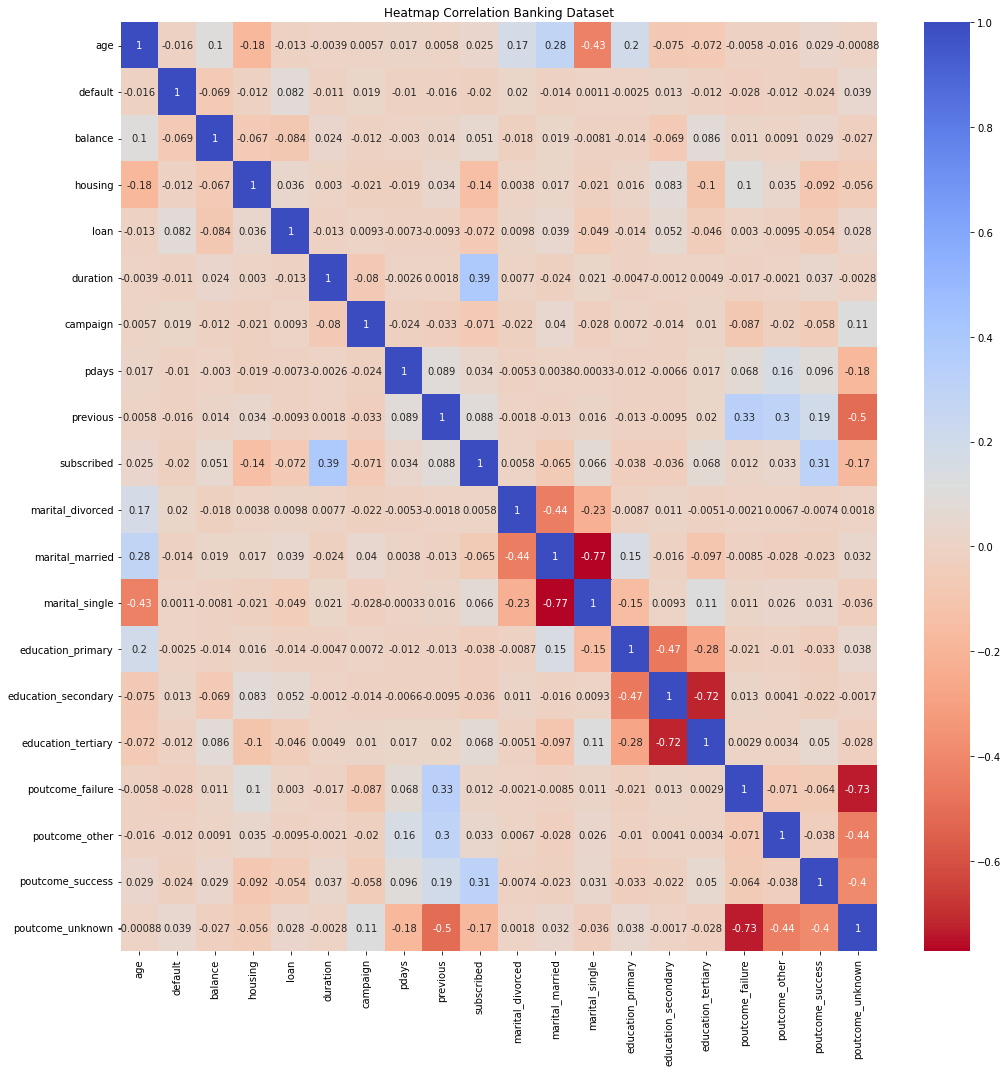

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(train_encoding.corr(),annot=True,cmap='coolwarm_r')
plt.title('Heatmap Correlation Banking Dataset')
plt.tight_layout()
plt.show()

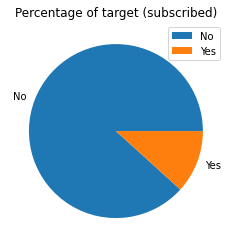

In [ ]:
train_encoding['subscribed'].value_counts().plot(kind='pie', labels=['No','Yes'])
plt.title('Percentage of target (subscribed)')
plt.legend(['No','Yes'])
plt.ylabel(None)
plt.show()

In [ ]:
# Handling data imbalance
from imblearn import under_sampling

X = train_encoding.drop(['subscribed'],axis=1)
y = train_encoding['subscribed']

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler(sampling_strategy=0.5).fit_resample(X, y)

In [ ]:
train_undersampling = pd.concat([X_under, y_under], axis=1)
train_undersampling.head(5)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,subscribed
0,43,0,369,1,0,75,3,0.0,0,0,1,0,0,1,0,0,0,0,1,0
1,58,0,9683,0,0,857,2,0.0,0,0,1,0,0,0,1,0,0,0,1,0
2,61,0,0,1,1,280,13,0.0,0,0,1,0,1,0,0,0,0,0,1,0
3,34,0,2048,1,0,307,2,0.0,0,0,1,0,0,1,0,0,0,0,1,0
4,54,0,111,0,0,29,13,0.0,0,0,1,0,0,1,0,0,0,0,1,0


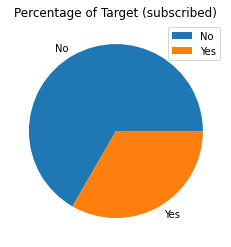

In [ ]:
train_undersampling['subscribed'].value_counts().plot(kind='pie',labels = ['No','Yes'])
plt.title('Percentage of Target (subscribed)')
plt.legend(['No','Yes'])
plt.ylabel(None)
plt.show()

In [ ]:
train_undersampling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11145 non-null  int64  
 1   default              11145 non-null  int64  
 2   balance              11145 non-null  int64  
 3   housing              11145 non-null  int64  
 4   loan                 11145 non-null  int64  
 5   duration             11145 non-null  int64  
 6   campaign             11145 non-null  int64  
 7   pdays                11145 non-null  float64
 8   previous             11145 non-null  int64  
 9   marital_divorced     11145 non-null  uint8  
 10  marital_married      11145 non-null  uint8  
 11  marital_single       11145 non-null  uint8  
 12  education_primary    11145 non-null  uint8  
 13  education_secondary  11145 non-null  uint8  
 14  education_tertiary   11145 non-null  uint8  
 15  poutcome_failure     11145 non-null 

## MODELING

# Decision Tree (Base Model)

In [ ]:
# split data test and train

from sklearn.model_selection import train_test_split

X = train_numerik.drop(['subscribed'],axis=1)
y = train_numerik['subscribed']

X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# modeling using decisiontree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=None)
model.fit(X_train_1, y_train_1)
preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import  recall_score, precision_score, f1_score
# calculate Precision
print('Precision ',precision_score(y_test, preds))
# calculate Recall
print('Recall ',recall_score(y_test, preds))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds))

Precision  0.3709677419354839
Recall  0.40902872777017785
F1 Score  0.38906961613532853


# Decision Tree 

In [ ]:
# split data test and train

from sklearn.model_selection import train_test_split

X = train_undersampling.drop(['subscribed'],axis=1)
y = train_undersampling['subscribed']

X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Split the train data into train and validation
X = X_train_1
y = y_train_1

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# modeling using decisiontree using validation data
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=None)
model.fit(X_train, y_train)
preds = model.predict(X_val)

In [ ]:
from sklearn.metrics import  recall_score, precision_score, f1_score
# calculate Precision
print('Precision ',precision_score(y_val, preds))
# calculate Recall
print('Recall ',recall_score(y_val, preds))
# calculate F1 Score
print('F1 Score ',f1_score(y_val, preds))

Precision  0.6333878887070377
Recall  0.6386138613861386
F1 Score  0.6359901396877568


In [ ]:
# modeling using decisiontree using test data
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=None)
model.fit(X_train, y_train)
preds = model.predict(X_val)

In [ ]:
from sklearn.metrics import  recall_score, precision_score, f1_score
# calculate Precision
print('Precision ',precision_score(y_val, preds))
# calculate Recall
print('Recall ',recall_score(y_val, preds))
# calculate F1 Score
print('F1 Score ',f1_score(y_val, preds))

Precision  0.6482982171799028
Recall  0.6600660066006601
F1 Score  0.6541291905151267


              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1178
           1       0.65      0.66      0.65       606

    accuracy                           0.76      1784
   macro avg       0.74      0.74      0.74      1784
weighted avg       0.76      0.76      0.76      1784



Text(33.0, 0.5, 'Real Value')

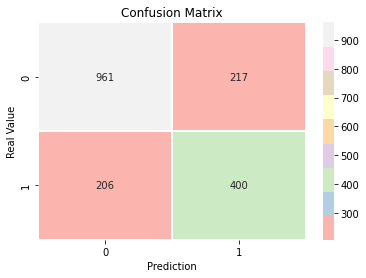

In [ ]:
# model Evaluation
from sklearn.metrics import confusion_matrix,classification_report
cnf_matrix = confusion_matrix(y_val, preds)
print(classification_report(y_val, preds))
sns.heatmap(cnf_matrix,cmap='Pastel1',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')

# Logistic Regression

In [ ]:
# modeling using LogisticRegression using validation data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# calculate Precision
print('Precision ',precision_score(y_val, preds))
# calculate Recall
print('Recall ',recall_score(y_val, preds))
# calculate F1 Score
print('F1 Score ',f1_score(y_val, preds))

Precision  0.7620041753653445
Recall  0.6023102310231023
F1 Score  0.6728110599078342


In [ ]:
# modeling using LogisticRegression using test data
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# calculate Precision
print('Precision ',precision_score(y_test, preds))
# calculate Recall
print('Recall ',recall_score(y_test, preds))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds))

Precision  0.7706896551724138
Recall  0.6243016759776536
F1 Score  0.6898148148148149


# Support Vector Machine

In [ ]:
# modeling using support Vector Machines using validation data
from sklearn import svm
model = svm.SVC(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_val)

In [ ]:
# calculate Precision
print('Precision ',precision_score(y_val, preds))
# calculate Recall
print('Recall ',recall_score(y_val, preds))
# calculate F1 Score
print('F1 Score ',f1_score(y_val, preds))

Precision  0.7298136645962733
Recall  0.38778877887788776
F1 Score  0.5064655172413792


In [ ]:
# modeling using support Vector Machines using test data
model = svm.SVC(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [ ]:
# calculate Precision
print('Precision ',precision_score(y_test, preds))
# calculate Recall
print('Recall ',recall_score(y_test, preds))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds))

Precision  0.7167919799498746
Recall  0.3994413407821229
F1 Score  0.5130044843049326


# Naive Bayes

In [ ]:
# modeling using naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
preds = model.predict(X_val)

In [ ]:
# calculate Precision
print('Precision ',precision_score(y_val, preds))
# calculate Recall
print('Recall ',recall_score(y_val, preds))
# calculate F1 Score
print('F1 Score ',f1_score(y_val, preds))

Precision  0.7044444444444444
Recall  0.523102310231023
F1 Score  0.6003787878787878


In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [ ]:
# calculate Precision
print('Precision ',precision_score(y_test, preds))
# calculate Recall
print('Recall ',recall_score(y_test, preds))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds))

Precision  0.7014652014652014
Recall  0.5349162011173184
F1 Score  0.606973058637084


# Random Forest

In [ ]:
# modeling using RandomForest using validation data
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_val)

In [ ]:
# calculate Precision
print('Precision ',precision_score(y_val, preds))
# calculate Recall
print('Recall ',recall_score(y_val, preds))
# calculate F1 Score
print('F1 Score ',f1_score(y_val, preds))

Precision  0.7464285714285714
Recall  0.6897689768976898
F1 Score  0.7169811320754716


In [ ]:
# modeling using RandomForest using test data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [ ]:
# calculate Precision
print('Precision ',precision_score(y_test, preds))
# calculate Recall
print('Recall ',recall_score(y_test, preds))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds))

Precision  0.729957805907173
Recall  0.7248603351955307
F1 Score  0.7274001401541696


              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1513
           1       0.73      0.72      0.73       716

    accuracy                           0.83      2229
   macro avg       0.80      0.80      0.80      2229
weighted avg       0.83      0.83      0.83      2229



Text(33.0, 0.5, 'Real Value')

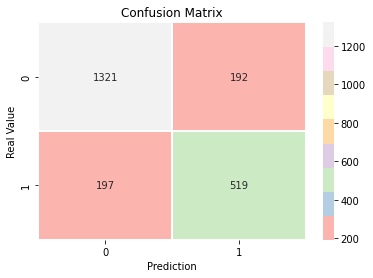

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds)
print(classification_report(y_test, preds))
sns.heatmap(cnf_matrix,cmap='Pastel1',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')

# Random Forest With Hyperparatemer Tunning

In [ ]:
# split data test and train for Hyperparatemer Tunning

X = train_undersampling.drop(['subscribed'],axis=1)
y = train_undersampling['subscribed']

X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Split the train data into train and validation for Hyperparatemer Tunning
X = X_train_1
y = y_train_1

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# this is the general overview of our dataset for Hyperparatemer Tunning
print(f'X : {X.shape}')
print('-'*50)
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print('-'*50)
print(f'X_val : {X_val.shape}')
print(f'y_val : {y_val.shape}')
print('-'*50)
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X : (8916, 19)
--------------------------------------------------
X_train : (7132, 19)
y_train : (7132,)
--------------------------------------------------
X_val : (1784, 19)
y_val : (1784,)
--------------------------------------------------
X_test : (2229, 19)
y_test : (2229,)


In [ ]:
# build random forest model with Hyperparatemer Tunning
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# number of features to consider at every split
max_features = ['auto','sqrt']
# maximum number of levels in tree
max_depth = [2,4]
# minimun number of samples required to split a node
min_samples_split = [2,5]
# minimun number of samples required at each lad node
min_samples_leaf = [1,2]
# method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# create the param grid
param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
grid_value = pd.Series(param_grid, name='param_grid')
grid_value.index.name = 'parameter'
grid_value.reset_index()
print(grid_value)

parameter
n_estimators         [10, 17, 25, 33, 41, 48, 56, 64, 72, 80]
max_features                                     [auto, sqrt]
max_depth                                              [2, 4]
min_samples_split                                      [2, 5]
min_samples_leaf                                       [1, 2]
bootstrap                                       [True, False]
Name: param_grid, dtype: object


In [ ]:
model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
model_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, verbose = 2, n_jobs = 4)

In [ ]:
model_grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
# the hyper parameter
model_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 48}

In [ ]:
# Hyperparatemer Tunning into the model
model = RandomForestClassifier(bootstrap = False, max_depth =  4, max_features =  'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 33, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_val)

In [ ]:
# calculate Precision
print('Precision ',precision_score(y_val, preds))
# calculate Recall
print('Recall ',recall_score(y_val, preds))
# calculate F1 Score
print('F1 Score ',f1_score(y_val, preds))

Precision  0.7470119521912351
Recall  0.6188118811881188
F1 Score  0.6768953068592058


In [ ]:
# modeling using RandomForest using test data
model = RandomForestClassifier(bootstrap = False, max_depth =  4, max_features =  'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 33, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [ ]:
# calculate Precision
print('Precision ',precision_score(y_test, preds))
# calculate Recall
print('Recall ',recall_score(y_test, preds))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds))

Precision  0.7559726962457338
Recall  0.6187150837988827
F1 Score  0.6804915514592934
